In [1]:
import pandas as pd
import keras
import numpy as np

Using TensorFlow backend.


In [23]:
data = pd.read_csv('E:/Python_code/keras_total/日月光华-keras课程资料/小型数据集/train1.csv')

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
y = data.Survived
x = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']].copy()

In [26]:
# 对Embarked列的数据处理：独热编码
# x.Embarked.unique()
x.loc[:, 'Embarked_S'] = (x.Embarked == 'S').astype('int')
x.loc[:, 'Embarked_C'] = (x.Embarked == 'C').astype('int')
x.loc[:, 'Embarked_Q'] = (x.Embarked == 'Q').astype('int')

In [27]:
del x['Embarked']

In [28]:
# 对Sex列的处理：数值化
x.loc[:, 'Sex'] = (x.Sex == 'male').astype('int')

In [29]:
# 对Age列处理：把缺数据的地方填入平均值
x.loc[:, 'Age'] = x.Age.fillna(x.Age.mean())

In [30]:
# 对Pclas列处理：数值化
x.loc[:, 'p1'] = (x.Pclass == 1).astype('int')
x.loc[:, 'p2'] = (x.Pclass == 2).astype('int')
x.loc[:, 'p3'] = (x.Pclass == 3).astype('int')

In [31]:
del x['Pclass']

In [32]:
x.shape, y.shape

((891, 11), (891,))

# 多层网络的搭建：

In [33]:
model = keras.Sequential()

In [34]:
from keras import layers

In [35]:
# 输入层有11个单元：11个特征
# 第一隐藏层：32个神经元，用relu激活，增加非线性关系；
model.add( layers.Dense(32, input_dim = 11, activation = 'relu') )
# 第二隐藏层：32个神经元，用relu激活
model.add( layers.Dense(32, activation = 'relu') )
# 输出层：1个神经元，用sigmoid激活 / 再把结果转化为[0,1]的概率值
model.add( layers.Dense(1, activation = 'sigmoid') )

In [36]:
model.summary()
# 384 = 11 * 32 + 32  —— 第一隐藏层的32个神经元，每个获得11个w和1个b
# 1056 = 32 * 32 + 32 —— 第二隐藏层的32个神经元，每个获得32个w和1个b
# 33 = 32 + 1 —— 输出层1个神经元，获得32个w和1个b

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile( optimizer = 'adam',
               loss = 'binary_crossentropy',
               metrics = ['acc']
)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
model.fit(x, y, epochs = 1000)

Epoch 1/1000
891/891 [==============================] - 0s 36us/step - loss: 0.2603 - acc: 0.8934
Epoch 2/1000
891/891 [==============================] - 0s 40us/step - loss: 0.2580 - acc: 0.8979
Epoch 3/1000
891/891 [==============================] - 0s 36us/step - loss: 0.2588 - acc: 0.8934
Epoch 4/1000
891/891 [==============================] - 0s 38us/step - loss: 0.2579 - acc: 0.8900
Epoch 5/1000
891/891 [==============================] - 0s 36us/step - loss: 0.2769 - acc: 0.8833
Epoch 6/1000
891/891 [==============================] - 0s 35us/step - loss: 0.2637 - acc: 0.8900
Epoch 7/1000
891/891 [==============================] - 0s 34us/step - loss: 0.2601 - acc: 0.8990
Epoch 8/1000
891/891 [==============================] - 0s 32us/step - loss: 0.2561 - acc: 0.8889
Epoch 9/1000
891/891 [==============================] - 0s 36us/step - loss: 0.2594 - acc: 0.8889
Epoch 10/1000
891/891 [==============================] - 0s 37us/step - loss: 0.2703 - acc: 0.8855
Epoch 11/1000
891/8

891/891 [==============================] - 0s 34us/step - loss: 0.2500 - acc: 0.8934
Epoch 84/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2527 - acc: 0.9024
Epoch 85/1000
891/891 [==============================] - 0s 31us/step - loss: 0.2619 - acc: 0.8844
Epoch 86/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2524 - acc: 0.8967
Epoch 87/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2558 - acc: 0.8979
Epoch 88/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2509 - acc: 0.8945
Epoch 89/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2499 - acc: 0.8956
Epoch 90/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2502 - acc: 0.8990
Epoch 91/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2452 - acc: 0.8979
Epoch 92/1000
891/891 [==============================] - 0s 26us/step - loss: 0.2467 - acc: 0.8990
Epoch 93/1000
891/891 [=

891/891 [==============================] - 0s 27us/step - loss: 0.2379 - acc: 0.8990
Epoch 166/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2498 - acc: 0.8956
Epoch 167/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2503 - acc: 0.8923
Epoch 168/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2520 - acc: 0.8990
Epoch 169/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2412 - acc: 0.9046
Epoch 170/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2421 - acc: 0.9024
Epoch 171/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2398 - acc: 0.9001
Epoch 172/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2379 - acc: 0.8967
Epoch 173/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2392 - acc: 0.9012
Epoch 174/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2340 - acc: 0.8990
Epoch 175/1000


891/891 [==============================] - 0s 27us/step - loss: 0.2454 - acc: 0.8967
Epoch 248/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2539 - acc: 0.8956
Epoch 249/1000
891/891 [==============================] - 0s 26us/step - loss: 0.2546 - acc: 0.8967
Epoch 250/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2450 - acc: 0.8990
Epoch 251/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2409 - acc: 0.8967
Epoch 252/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2296 - acc: 0.9012
Epoch 253/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2360 - acc: 0.9024
Epoch 254/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2376 - acc: 0.8990
Epoch 255/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2324 - acc: 0.9035
Epoch 256/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2339 - acc: 0.9024
Epoch 257/1000


891/891 [==============================] - 0s 30us/step - loss: 0.2238 - acc: 0.9035
Epoch 330/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2324 - acc: 0.9024
Epoch 331/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2346 - acc: 0.8923
Epoch 332/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2307 - acc: 0.9035
Epoch 333/1000
891/891 [==============================] - 0s 26us/step - loss: 0.2333 - acc: 0.8967
Epoch 334/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2261 - acc: 0.9080
Epoch 335/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2259 - acc: 0.9035
Epoch 336/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2215 - acc: 0.9057
Epoch 337/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2213 - acc: 0.9091
Epoch 338/1000
891/891 [==============================] - 0s 26us/step - loss: 0.2249 - acc: 0.9057
Epoch 339/1000


891/891 [==============================] - 0s 28us/step - loss: 0.2207 - acc: 0.9068
Epoch 412/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2206 - acc: 0.9046
Epoch 413/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2284 - acc: 0.9024
Epoch 414/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2200 - acc: 0.9080
Epoch 415/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2171 - acc: 0.9113
Epoch 416/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2191 - acc: 0.9091
Epoch 417/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2185 - acc: 0.9035
Epoch 418/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2195 - acc: 0.9147
Epoch 419/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2215 - acc: 0.9035
Epoch 420/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2224 - acc: 0.9091
Epoch 421/1000


891/891 [==============================] - 0s 30us/step - loss: 0.2236 - acc: 0.9046
Epoch 494/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2144 - acc: 0.9113
Epoch 495/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2395 - acc: 0.8934
Epoch 496/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2404 - acc: 0.9035
Epoch 497/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2581 - acc: 0.9001
Epoch 498/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2365 - acc: 0.9046
Epoch 499/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2259 - acc: 0.9035
Epoch 500/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2285 - acc: 0.9046
Epoch 501/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2206 - acc: 0.9113
Epoch 502/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2234 - acc: 0.8956
Epoch 503/1000


891/891 [==============================] - 0s 29us/step - loss: 0.2066 - acc: 0.9169
Epoch 576/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2086 - acc: 0.9203
Epoch 577/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2143 - acc: 0.9147
Epoch 578/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2084 - acc: 0.9203
Epoch 579/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2059 - acc: 0.9136
Epoch 580/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2210 - acc: 0.9068
Epoch 581/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2206 - acc: 0.9057
Epoch 582/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2087 - acc: 0.9169
Epoch 583/1000
891/891 [==============================] - 0s 44us/step - loss: 0.2031 - acc: 0.9113
Epoch 584/1000
891/891 [==============================] - 0s 36us/step - loss: 0.2097 - acc: 0.9147
Epoch 585/1000


891/891 [==============================] - 0s 28us/step - loss: 0.2067 - acc: 0.9136
Epoch 658/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2122 - acc: 0.9102
Epoch 659/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2080 - acc: 0.9125
Epoch 660/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2119 - acc: 0.9102
Epoch 661/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2134 - acc: 0.9147
Epoch 662/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2076 - acc: 0.9113
Epoch 663/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2344 - acc: 0.9035
Epoch 664/1000
891/891 [==============================] - 0s 29us/step - loss: 0.2204 - acc: 0.9068
Epoch 665/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2068 - acc: 0.9192
Epoch 666/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2097 - acc: 0.9068
Epoch 667/1000


891/891 [==============================] - 0s 28us/step - loss: 0.2497 - acc: 0.9147
Epoch 740/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2228 - acc: 0.9024
Epoch 741/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2140 - acc: 0.9091
Epoch 742/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2040 - acc: 0.9181
Epoch 743/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2058 - acc: 0.9158
Epoch 744/1000
891/891 [==============================] - 0s 34us/step - loss: 0.2028 - acc: 0.9147
Epoch 745/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2033 - acc: 0.9181
Epoch 746/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2082 - acc: 0.9113
Epoch 747/1000
891/891 [==============================] - 0s 34us/step - loss: 0.2059 - acc: 0.9080
Epoch 748/1000
891/891 [==============================] - 0s 32us/step - loss: 0.2128 - acc: 0.9125
Epoch 749/1000


891/891 [==============================] - 0s 31us/step - loss: 0.2014 - acc: 0.9248
Epoch 822/1000
891/891 [==============================] - 0s 32us/step - loss: 0.2043 - acc: 0.9169
Epoch 823/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2066 - acc: 0.9203
Epoch 824/1000
891/891 [==============================] - 0s 31us/step - loss: 0.2113 - acc: 0.9102
Epoch 825/1000
891/891 [==============================] - 0s 32us/step - loss: 0.2004 - acc: 0.9158
Epoch 826/1000
891/891 [==============================] - 0s 31us/step - loss: 0.2076 - acc: 0.9113
Epoch 827/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2006 - acc: 0.9169
Epoch 828/1000
891/891 [==============================] - 0s 30us/step - loss: 0.1984 - acc: 0.9237
Epoch 829/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2064 - acc: 0.9169
Epoch 830/1000
891/891 [==============================] - 0s 29us/step - loss: 0.1953 - acc: 0.9237
Epoch 831/1000


Epoch 903/1000
891/891 [==============================] - 0s 32us/step - loss: 0.1936 - acc: 0.9248
Epoch 904/1000
891/891 [==============================] - 0s 29us/step - loss: 0.1997 - acc: 0.9181
Epoch 905/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2002 - acc: 0.9158
Epoch 906/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2076 - acc: 0.9125
Epoch 907/1000
891/891 [==============================] - 0s 27us/step - loss: 0.1974 - acc: 0.9203
Epoch 908/1000
891/891 [==============================] - 0s 26us/step - loss: 0.1979 - acc: 0.9169
Epoch 909/1000
891/891 [==============================] - 0s 30us/step - loss: 0.1980 - acc: 0.9181
Epoch 910/1000
891/891 [==============================] - 0s 28us/step - loss: 0.1976 - acc: 0.9147
Epoch 911/1000
891/891 [==============================] - 0s 30us/step - loss: 0.2041 - acc: 0.9181
Epoch 912/1000
891/891 [==============================] - 0s 32us/step - loss: 0.2074 - acc: 0.9136


891/891 [==============================] - 0s 29us/step - loss: 0.1954 - acc: 0.9080
Epoch 985/1000
891/891 [==============================] - 0s 28us/step - loss: 0.1929 - acc: 0.9203
Epoch 986/1000
891/891 [==============================] - 0s 28us/step - loss: 0.1957 - acc: 0.9158
Epoch 987/1000
891/891 [==============================] - 0s 26us/step - loss: 0.1947 - acc: 0.9237
Epoch 988/1000
891/891 [==============================] - 0s 29us/step - loss: 0.1941 - acc: 0.9203
Epoch 989/1000
891/891 [==============================] - 0s 28us/step - loss: 0.2085 - acc: 0.9203
Epoch 990/1000
891/891 [==============================] - 0s 25us/step - loss: 0.2048 - acc: 0.9169
Epoch 991/1000
891/891 [==============================] - 0s 26us/step - loss: 0.2287 - acc: 0.9080
Epoch 992/1000
891/891 [==============================] - 0s 27us/step - loss: 0.2189 - acc: 0.9080
Epoch 993/1000
891/891 [==============================] - 0s 30us/step - loss: 0.1985 - acc: 0.9214
Epoch 994/1000


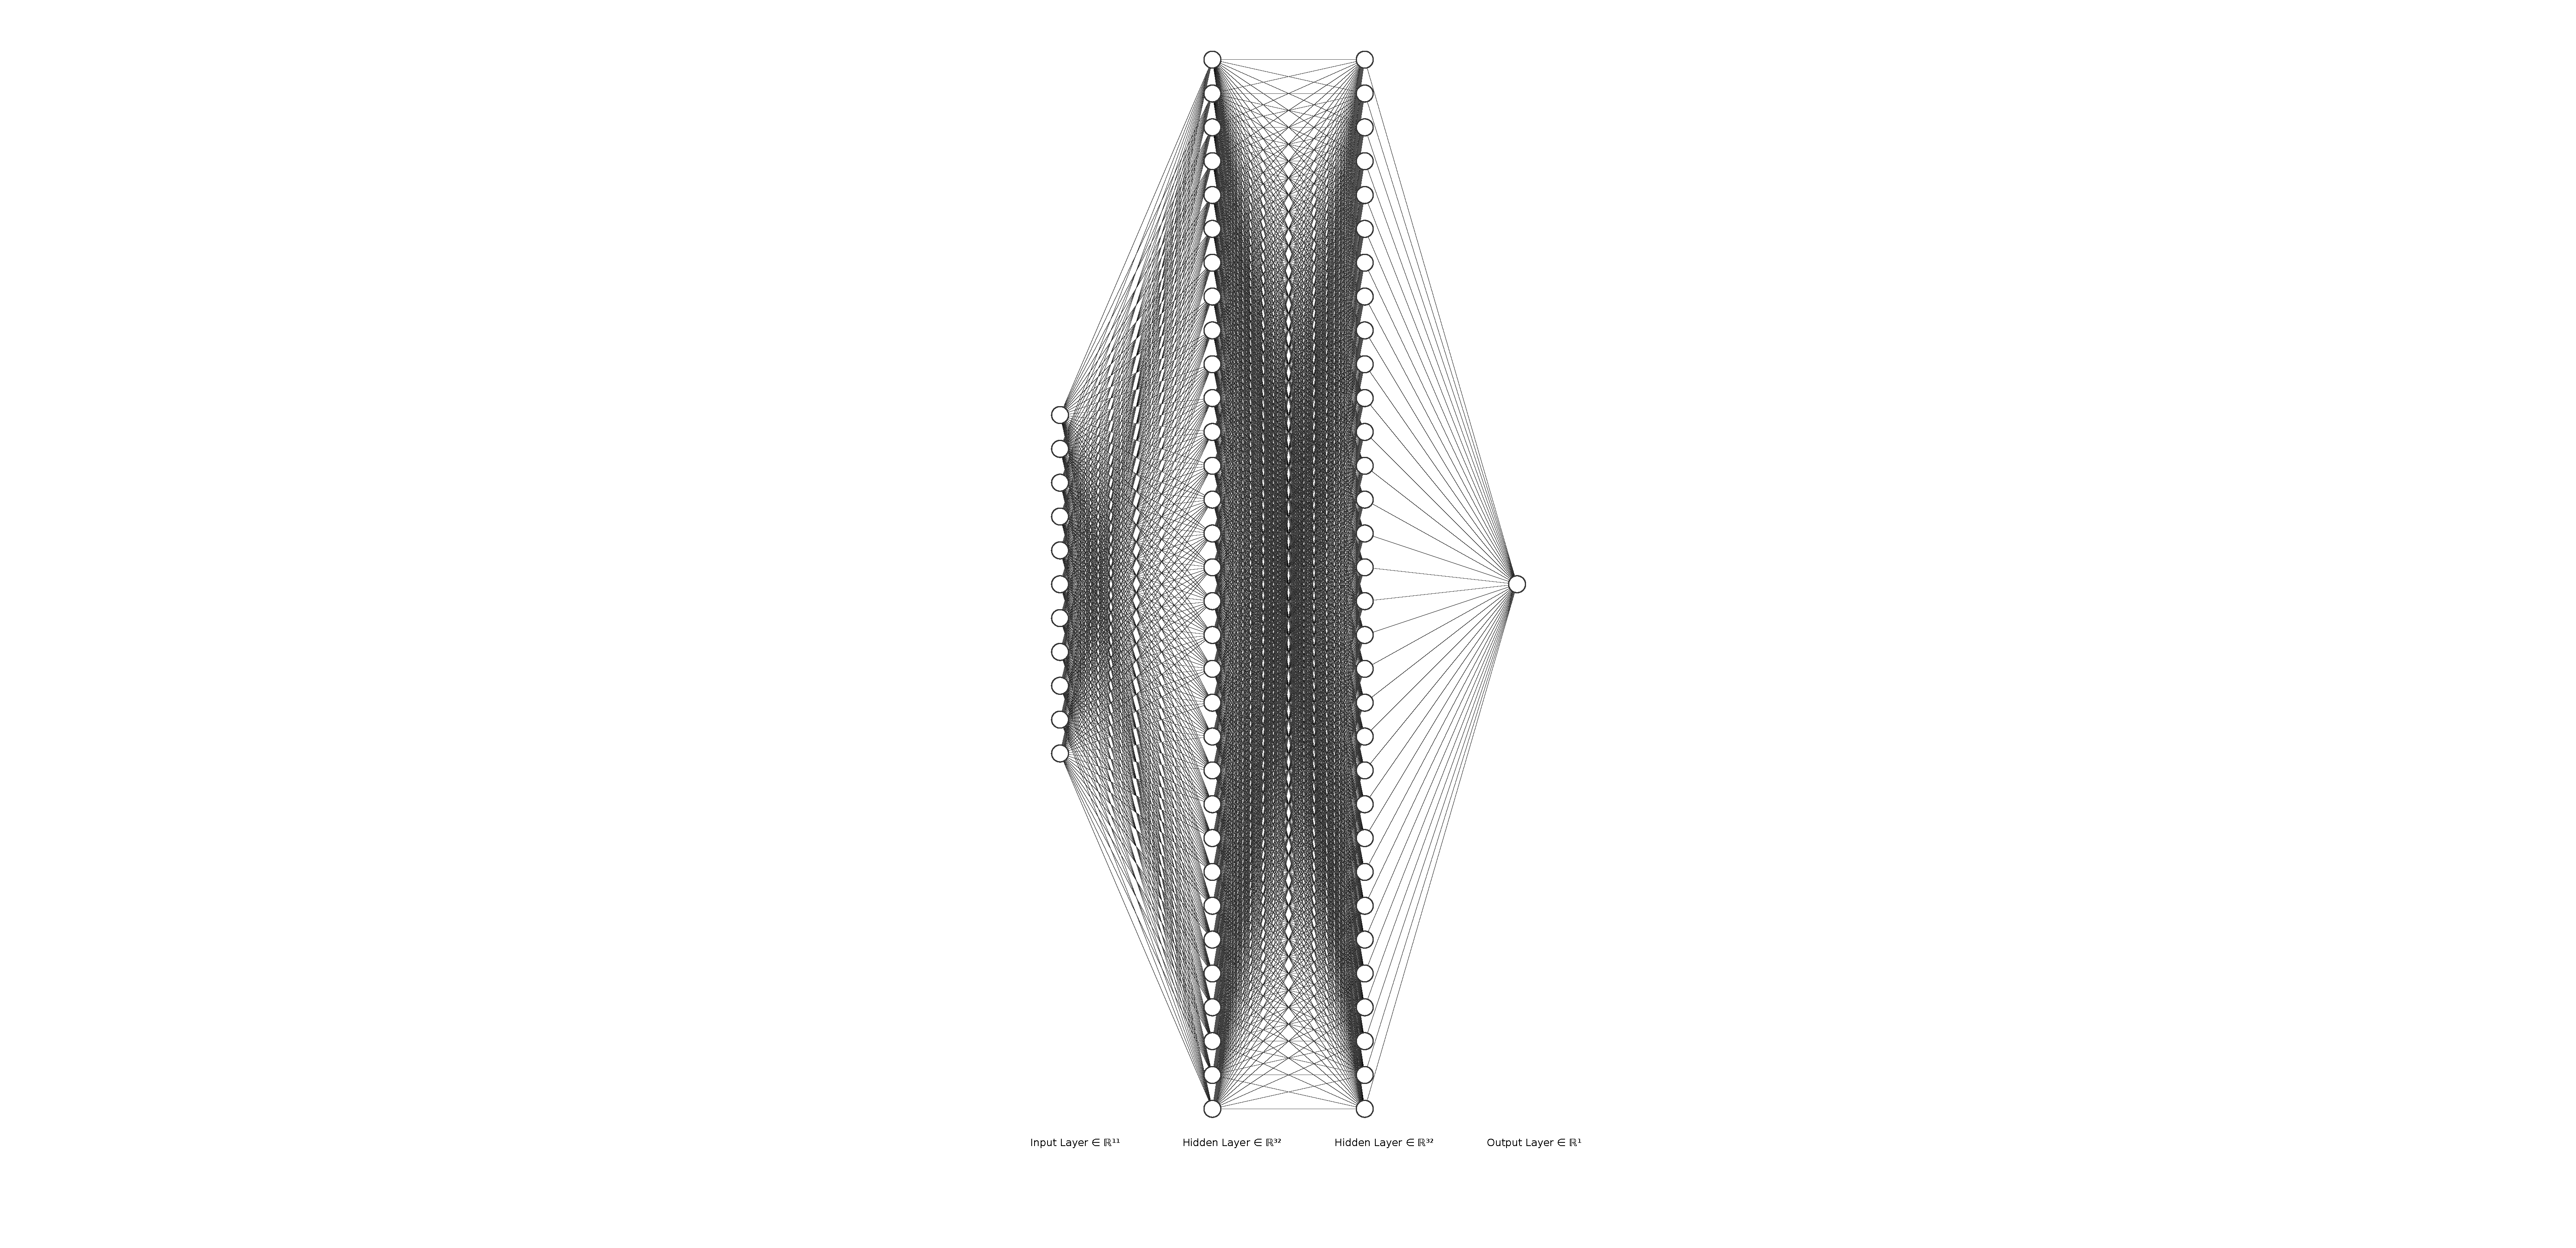